<a href="https://colab.research.google.com/github/yonaan/PPG-BP/blob/preprocess/p040063.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [88]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.signal import find_peaks


# If the CSV file is in Google Drive
# df = pd.read_csv('/content/drive/MyDrive/path/to/your/file.csv')

# If the CSV file is uploaded directly to Colab
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/PPG_Signal/p040063.csv')  # Replace 'file.csv' with the path to your CSV file
print(df.head())  # Display the first few rows of the DataFrame

sys = df['Mean_NBP_Sys'].values
dia = df['Mean_NBP_Dias'].values

print(sys, ' / ', dia)

columns_to_remove = ['Mean_NBP_Sys', 'Mean_NBP_Dias']
cleaned_df = df.drop(columns=columns_to_remove)

print(cleaned_df.head())

          0         1        2         3         4         5         6  \
0  0.352941  0.352941  0.34902  0.345098  0.341176  0.333333  0.329412   

          7         8         9  ...      4192      4193      4194      4195  \
0  0.321569  0.317647  0.309804  ...  0.341176  0.341176  0.341176  0.341176   

       4196      4197      4198      4199  Mean_NBP_Sys  Mean_NBP_Dias  
0  0.341176  0.341176  0.337255  0.337255    119.043478      56.565217  

[1 rows x 4202 columns]
[119.04347826]  /  [56.56521739]
          0         1        2         3         4         5         6  \
0  0.352941  0.352941  0.34902  0.345098  0.341176  0.333333  0.329412   

          7         8         9  ...      4190      4191      4192      4193  \
0  0.321569  0.317647  0.309804  ...  0.337255  0.341176  0.341176  0.341176   

       4194      4195      4196      4197      4198      4199  
0  0.341176  0.341176  0.341176  0.341176  0.337255  0.337255  

[1 rows x 4200 columns]


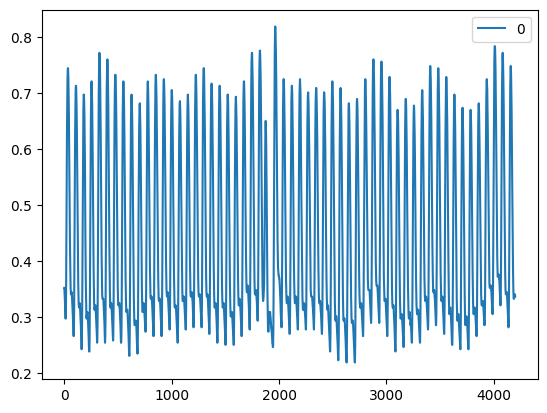

In [89]:
# Transpose the DataFrame
transposed_df = cleaned_df.T

# Plot a line graph of the transposed DataFrame
transposed_df.plot(kind='line')

# Display the plot
plt.show()

In [90]:
def find_peaks_in_data(data):
    """
    Find peaks in the data and plot them.

    Parameters:
    - data: DataFrame or Series with one row or transposed DataFrame

    Returns:
    - peaks: Dictionary containing indices and corresponding values of peaks
    """
    # Convert DataFrame or Series to numpy array
    values = data.values.flatten() if isinstance(data, pd.DataFrame) else data.values

    # Find peaks in the data
    peaks, _ = find_peaks(values)

    # Plot the data and highlight the peaks
    plt.plot(values, label='Data')
    plt.plot(peaks, values[peaks], 'ro', label='Peaks')
    plt.xlabel('Index')
    plt.ylabel('Value')
    plt.title('Peaks in Data')
    plt.legend()
    plt.show()

    # Return peaks as a dictionary containing indices and corresponding values
    peaks_dict = {'indices': peaks, 'values': values[peaks]}

    # Create a DataFrame containing peak values
    peak_values_df = pd.DataFrame({'Index': peaks, 'Value': values[peaks]})

    return peaks_dict, peak_values_df

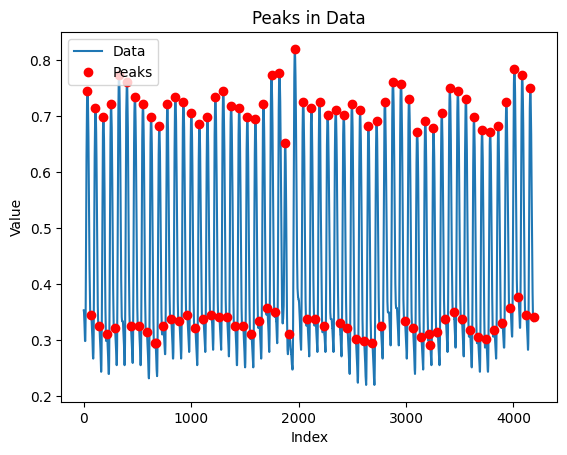

{'indices': array([  34,   67,  108,  143,  182,  214,  254,  288,  327,  401,  437,
        475,  511,  550,  585,  626,  662,  668,  703,  740,  778,  812,
        852,  887,  927,  963, 1001, 1037, 1076, 1112, 1151, 1186, 1225,
       1260, 1298, 1333, 1372, 1409, 1447, 1482, 1522, 1559, 1598, 1633,
       1673, 1708, 1748, 1784, 1822, 1875, 1914, 1965, 2043, 2080, 2119,
       2156, 2195, 2232, 2270, 2345, 2381, 2420, 2455, 2496, 2532, 2573,
       2607, 2650, 2685, 2726, 2764, 2803, 2879, 2953, 2989, 3028, 3064,
       3104, 3141, 3180, 3216, 3226, 3256, 3292, 3333, 3368, 3408, 3443,
       3482, 3520, 3557, 3594, 3633, 3669, 3708, 3744, 3784, 3820, 3859,
       3897, 3934, 3970, 4009, 4045, 4082, 4119, 4157, 4194]), 'values': array([0.74509804, 0.34509804, 0.71372549, 0.3254902 , 0.69803922,
       0.30980392, 0.72156863, 0.32156863, 0.77254902, 0.76078431,
       0.3254902 , 0.73333333, 0.3254902 , 0.72156863, 0.31372549,
       0.69803922, 0.29411765, 0.29411765, 0.68235294, 0.

In [91]:
peaks, peak_values_df = find_peaks_in_data(transposed_df)
print(peaks)
print(peak_values_df)

In [92]:
def split_values_high_low(filtered_df, threshold=0.6):
    """
    Split values in filtered_df into two arrays based on the specified threshold for high values.

    Parameters:
    - filtered_df: DataFrame containing filtered values
    - threshold: float, minimum value required to be considered as high (default: 0.6)

    Returns:
    - high_values: list of high values (greater than or equal to threshold)
    - low_values: list of low values (less than threshold)
    """
    high_values = []
    low_values = []

    for value in filtered_df['Value']:
        if value >= threshold:
            high_values.append(value)
            low_values.append(None)  # Placeholder for low value
        else:
            high_values.append(None)  # Placeholder for high value
            low_values.append(value)

    return high_values, low_values



high_values, low_values = split_values_high_low(peak_values_df)
print(high_values)
print(low_values)


[0.7450980392156863, None, 0.7137254901960784, None, 0.6980392156862745, None, 0.7215686274509804, None, 0.7725490196078432, 0.7607843137254902, None, 0.7333333333333333, None, 0.7215686274509804, None, 0.6980392156862745, None, None, 0.6823529411764706, None, 0.7215686274509804, None, 0.7333333333333333, None, 0.7254901960784313, None, 0.7058823529411765, None, 0.6862745098039216, None, 0.6980392156862745, None, 0.7333333333333333, None, 0.7450980392156863, None, 0.7176470588235294, None, 0.7137254901960784, None, 0.6980392156862745, None, 0.6941176470588235, None, 0.7215686274509804, None, 0.7725490196078432, None, 0.7764705882352941, 0.6509803921568628, None, 0.8196078431372549, 0.7254901960784313, None, 0.7137254901960784, None, 0.7254901960784313, None, 0.7019607843137254, 0.7098039215686275, None, 0.7019607843137254, None, 0.7215686274509804, None, 0.7098039215686275, None, 0.6823529411764706, None, 0.6901960784313725, None, 0.7254901960784313, 0.7607843137254902, 0.7568627450980

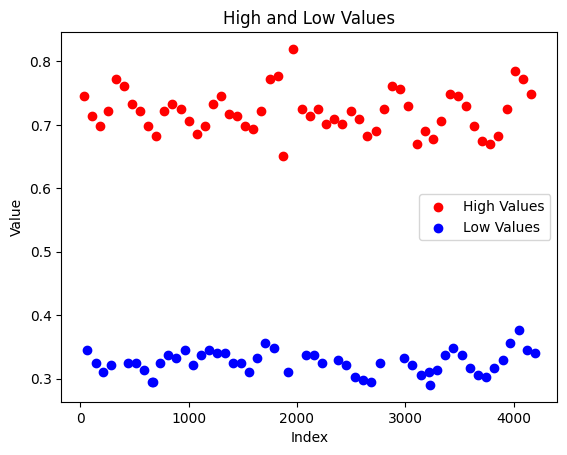

In [93]:
# Plot high values
plt.scatter(peak_values_df['Index'], high_values, color='red', label='High Values')

# Plot low values
plt.scatter(peak_values_df['Index'], low_values, color='blue', label='Low Values')

# Add labels and title
plt.xlabel('Index')
plt.ylabel('Value')
plt.title('High and Low Values')
plt.legend()

# Show plot
plt.show()


In [94]:
# Calculate the average of high values
average_high = np.mean([value for value in high_values if value is not None])

# Calculate the average of low values
average_low = np.mean([value for value in low_values if value is not None])

print("Average High Value:", average_high)
print("Average Low Value:", average_low)



Average High Value: 0.7203781512605042
Average Low Value: 0.32601809954751126
